# More about Functions

We defined *"programming"* as the **process of breaking** a large, **complex computational task** into smaller and smaller **subtasks**, until the subtasks are simple enough to be performed by combining basic instructions. Sometimes it is useful to associate a **name** with these subtasks, which becomes **functions**. 

In the context of programming, a **function** is thus a **named group of statements** that performs
a computation. 
Each function must be before **“defined”** and then **“called”** by its name.

We already used a lot of **pre-defined functions**, by calling them with suitable **arguments**:
```python
                      int('32')
                      type(1.3)
                      len("Hello")
```
We also used **composition of functions**, where the **return of a function** is used in turn as a argument of another, and so on:
```python
                      input_num = "44"
                      print(str(int(input_num) + 1))
```
Note that the argument of a function can be any kind of expression, including arithmetic operators.


In [1]:
input_num = "44"
print(str(int(input_num) + 1))


45


# Defining and calling a function

To **define** and then **call/invoke** a function, you have to use the following **syntax**:

```python
        def name_of_function([<list of comma-separated parameters>]):  # the list can be empty
            < indented block of statements>

        ....
        
        name_of_function([<list of comma-separated arguments>])        # function call
```

Therefore, if **function arguments** are needed, when you define the function you have to introduce one or more variables called **parameters** between a pair of parentheses. For example:
```python
        def print_twice(param1, param2):
            print(param1, param2)
            print(param1, param2)
```
This function assigns the arguments, passed at calling time, to the two parameters `param1` and  `param1`. Indeed, when the function `print_twice` is called, it prints the value of the two parameters twice. For example, after the definition, you can call the function as follows:
```python
        print_twice("Thanks", 1000)
```
This function works with any argument that can be printed by the build-in function `print`.

You can also pass **expressions as arguments**, which are first evaluated before being assigned to the parameter variables.
For example, look at the code below, where we also defined a function without parameters:

In [12]:
def print_twice(param1, param2):
    print(param1, param2)
    print(param1, param2)
    

def print_my_strings():
    print("Hello!")
    print("How are yoy from 0 to 10?")

print_twice('Thanks ' * 4, 1000)  # you can apply '*' operator to strings too!!
print()
print_my_strings()                # no arguments must be passed in this case

Thanks Thanks Thanks Thanks  1000
Thanks Thanks Thanks Thanks  1000

Hello!
How are yoy from 0 to 10?


# Functions and Flow of control/execution

Recall that program execution always begins at the first statement of the program. Statements are run one at a
time, in order from top to bottom.

**Function definitions** _do not alter the flow of execution of the program_, and the statements inside the function definintion **don't** run until the function is called.

A **function call** is like a **detour in the flow of execution**. Instead of going to the next statement,
the **flow jumps** to the body of the function, and runs the statements there, and then **comes
back** to resume from where it left off.  

This execution scheme works well even if the called function calls another, and so on. 
And Python is good at keeping track of where the flow of execution is, moving forward and backward between different functions.

In summary, when you read a program, you don’t always want to read from top to bottom. Sometimes it makes more sense if you follow the flow of execution.

# Variables and parameters within functions are local

When you create a **variable** inside a function definition, it is **local**, and its **lifetime** starts when the function is called and ends when the execution of the called function ends.

*Parameters* are also local. For example, outside `print_twice`, there is no known variables `param1` or `param2`. See the example below, and discuss because they generate run-time errors.

In [2]:
def foo(val):
    incr = 12
    a = 10
    val = val + incr + 10
    print(val)


a = 20

foo(8)

print(a)  # the variable is **not** the one defined in the body of foo()
print(incr) # the variable is **not** defined in this environment
print(val)
    
# try to create a variable incr and val outside the function
# run by using pythontutor to visualize the execution

30
20


NameError: name 'incr' is not defined

## Default values of parameter

When you define a function you can specify a default value for one or more arguments. This creates a function that can be called with fewer arguments.

In [3]:
def print_twice(param1, param2 = 'Salvatore!', param3 = 'How are you?'):
    print(param1, param2, param3)
    print(param1, param2, param3)
    
print_twice('Hello')
print_twice('Ciao')
print_twice('Hello', param2="Giovanni!", param3 = 'How old are you?')


Hello Salvatore! How are you?
Hello Salvatore! How are you?
Ciao Salvatore! How are you?
Ciao Salvatore! How are you?
Hello Giovanni! How old are you?
Hello Giovanni! How old are you?


# Docstrings

To document a function, a *docstring* should be used.

It is a text put at the beginning of a function to explains the interface (“doc” is
short for “documentation”). Here is an example:

```python
        def fib(n):    
              """
                  Print a Fibonacci series up to n.
                  
                  Args:
                     n: limit of the value to include in the series.
                  Returns:
                     No return value, but print the list.

              """
              a = 0 # first Fibonacci value
              b = 1 # second Fibonacci value
              while a <= n:
                  print(a, end='')
                  a_old = a
                  a = a+b
                  b = a_old
              print()
```

By convention, all docstrings are triple-quoted strings, also known as multiline string
because the triple quotes allow the string to span more than one line.

Docstring are treated by Python as *multiline comments*.

There are tools which use docstrings to automatically produce online or printed documentation, or to let the user interactively browse through code.

In [18]:
def fib(n):    
    '''
    Print a Fibonacci series up to n.
                  
    Args:
       n: limit of the value to include in the series.
    Returns:
       No return value, but print the list.
    '''
    if n == 0:
        print(0) # first Fibonacci value
    elif n >= 1:
        print(0, 1, 1, end=' ') # first three Fibonacci values
        a = 2  # 4th Fib value (to print)
        b = 1  # 3rd Fib value (already printed)
        while a <= n:
            print(a, end=' ')
            a_old = a
            a = a + b    # compute the next Fib value and ri-assign a
            b = a_old    # move b to the penultimate Fib value
    print()
    
fib(300)  # call the function

0 1 1 2 3 5 8 13 21 34 55 89 144 233 


# Fruitful functions

Many of the Python functions we have used produce return
values. 

But the above functions are all **void**: they have an effect, as they print values, but they do not have a return value. How can we write **fruitful** functions?

Look at this example, a function that returns the area of a circle with the given radius:

```python
    def area(radius):
        a = 3.14 * radius**2
        return a
```

We can use the `return` statement with or without arguments.
If the function is *void*, the `return` statement forces the exit from function.
If the function is *fruitful*, the `return` statement must be followed by an expression, as in the example above.

You can use fruitful functions within expressions, or assign the fuction, indeed the returned value, to a variable.


In [4]:
def area_circle(radius):
    a = 3.14 * radius**2
    return a

def area_square(side):
    return side**2

total = area_circle(10) + area_square(3) # usage of fruitful functions within expressions, eventually assigned to a variable
print(total)

323.0


# Advanced topic: recursive functions

A **recursive definition** is similar to
a circular definition, in the sense that the definition contains a reference to the thing being
defined.

It is very common in mathematics. For example, the **factorial** $n! = 1 \cdot 2 \cdot \ldots \cdot n$ can be expressed as follows:

$$ 
0! = 1\\
n! = n \cdot (n - 1)!
$$

This definition says that the factorial of $0$ is $1$, and the factorial of any other value, $n$, is $n$
multiplied by the factorial of $n - 1$.

So $3!$ is $3$ times $2!$, which is $2$ times $1!$, which is $1$ times $0!$. $0!$ is the base case, where the definition is known.

Putting it all together, $3!$ is equal to $3 \cdot 2 \cdot 1 = 6$.


If you can write a recursive definition of something, you can write a Python program to
evaluate it. 


The first step is to decide what the parameters should be. In this case it should
be clear that factorial takes an integer:
```python
           def factorial(n):
```
If the argument happens to be 0, all we have to do is return 1, otherwise we have to make a **recursive call** to find the
factorial of $n - 1$ and then multiply it by $n$:

```python
           def factorial(n):
               if n == 0:
                   return 1
               else:
                   recurse = factorial(n-1)
                   result = n * recurse
                   return result        
```

Since $3$ is not $0$, we take the second branch and calculate the factorial of $n-1$ (which is $2$)...<br/>
&nbsp;&nbsp;&nbsp;&nbsp;Since $2$ is not $0$, we take the second branch and calculate the factorial of $n-1$ (which is $1$)...<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Since $1$ is not $0$, we take the second branch and calculate the factorial
of $n-1$ (which is $0$)...<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Since $0$ equals $0$, we take the first branch and return $1$ without making any more recursive calls.<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The return value, $1$, is multiplied by $n$, which is $1$, and the result is returned.<br/>
&nbsp;&nbsp;&nbsp;&nbsp;The return value, $1$, is multiplied by $n$, which is $2$, and the result is returned.<br/>
The return value ($2$) is multiplied by $n$, which is $3$, and the result, $6$, becomes the return
value of the function call that started the whole process.

Try with  [Python Tutor](http://pythontutor.com/visualize.html#mode=edit) by defining and then calling the function:

```python
           result = factorial(3)
```





# Advanced topic: Stack diagrams

To keep track of which variables can be used where, it is sometimes useful to draw a **stack
diagram**, which shows the value of each variable but they
also show *the function each variable belongs to*.

*Each function* is represented by a **frame**, indeed a box with the name of a function
beside it and the parameters and variables of the function inside it. 

The *frames* are arranged in a **stack** that indicates which function called which, and so
on. 

The following is the stack diagram of the call of 
```python
       result = factorial(3)
```

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;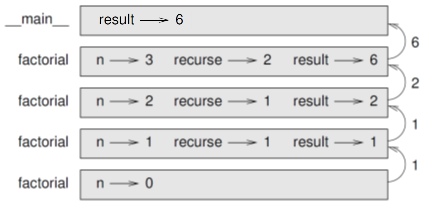

The return values are shown being passed back up the stack. In each frame, the return
value is the value of ```result```, which is the product of $n$ and ```recurse```.

In the last frame, the local variables ```recurse``` and ```result``` do not exist, because the branch
that creates them does not run.

Note how many different instances of variable ```result``` are generated during the recursive call.


# Exercises

1. Write a recursive function that realizes *fibonacci*, defined recursively as follows:
$$ 
fib(0) = 0\\
fib(1) = 1\\
fib(n) = fib(n-1) + fib(n-2)
$$
2. Write a recursive function that computes the sum of a list of integers. 
$$ 
sum\_list([]) = 0\\
sum\_list([elem]) = elem\\
sum\_list([elem1, elem2, ...]) = elem + sum\_list[elem2, ...]
$$
3. Write a function named ```uses_all``` that takes a word and a string of required letters, and that returns *True* if the word uses all the required letters at least once, and *False* otherwise. Apply the function to the string: "Venice is a city in northeastern Italy and the capital of the Veneto region. It is situated across a group of 118 small islands that are separated by canals and linked by bridges, of which there are 400." by using "ae" as required letters.
4. Write a function ```check_prime``` that takes an integer and returns *True* if the number is prime, and *False* otherwise.


In [2]:
# Exercise 1
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        fib1 = fib(n-1)
        fib2 = fib(n-2)
        return fib1 + fib2

for i in range(20):
    print(fib(i), end=' ')

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 